Author: Amitabh Chakravorty

DATA EXPLORATION - Understanding Dataset Structure

In [1]:
# ============================================================================
# SETUP
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

# Mount drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/cryptojacking_validation'
os.chdir(base_path)

print("Working directory:", os.getcwd())

Mounted at /content/drive
Working directory: /content/drive/MyDrive/cryptojacking_validation




DS2OS DATASET EXPLORATION



Files in ds2os directory:
  - DS2OS.csv

CSV files found: ['DS2OS.csv']

 Dataset Shape: (357952, 13)
   Rows: 357,952
   Columns: 13

 Column Names:
    1. sourceID
    2. sourceAddress
    3. sourceType
    4. sourceLocation
    5. destinationServiceAddress
    6. destinationServiceType
    7. destinationLocation
    8. accessedNodeAddress
    9. accessedNodeType
   10. operation
   11. value
   12. timestamp
   13. normality

 First 5 Rows:
        sourceID          sourceAddress       sourceType   sourceLocation  \
0  lightcontrol2  /agent2/lightcontrol2  /lightControler   BedroomParents   
1  lightcontrol3  /agent3/lightcontrol3  /lightControler      Dinningroom   
2  lightcontrol1  /agent1/lightcontrol1  /lightControler  BedroomChildren   
3  lightcontrol4  /agent4/lightcontrol4  /lightControler          Kitchen   
4      movement4      /agent4/movement4  /movementSensor          Kitchen   

  destinationServiceAddress destinationServiceType destina

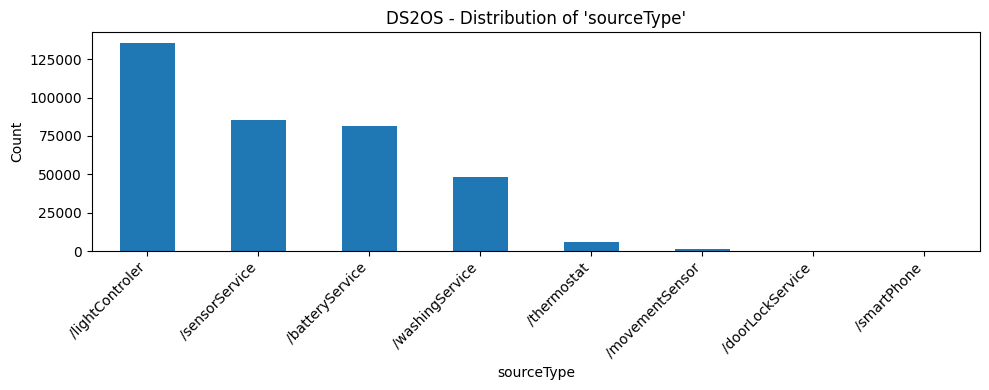


   Distribution of 'destinationServiceType':
destinationServiceType
/sensorService      130313
/batteryService     129125
/movementSensor      93645
/washingService       1805
/lightControler       1694
/doorLockService      1048
/thermostat            319
/smartPhone              3
Name: count, dtype: int64


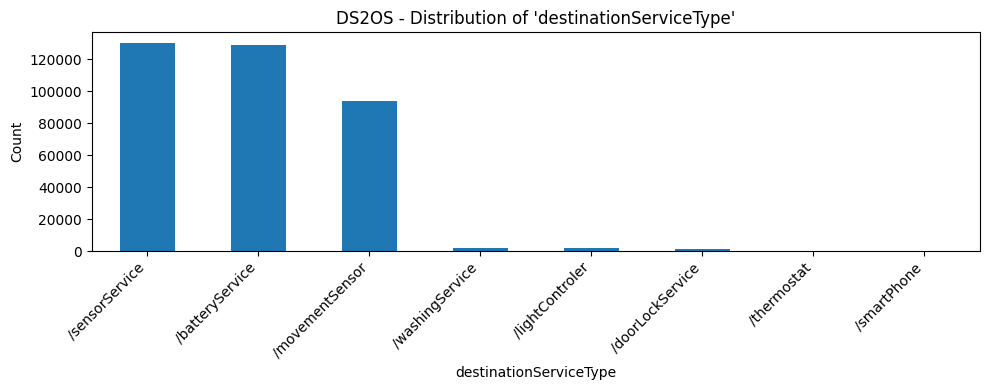


   Distribution of 'accessedNodeType':
accessedNodeType
/sensorService      130155
/derived/boolean     94725
/basic/number        90016
/basic/text          42433
/thermostat            313
/basic/composed        100
/lightControler         23
/movementSensor         22
/batteryService          6
/doorLockService         5
/washingService          3
/smartPhone              3
Name: count, dtype: int64


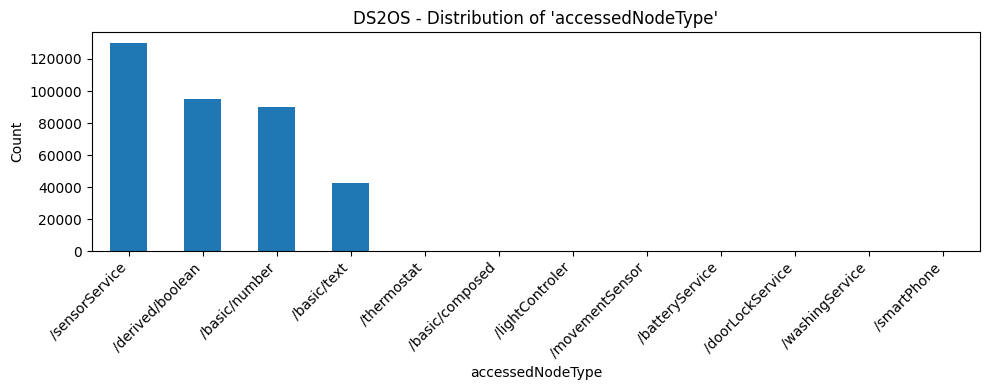

In [2]:
# ============================================================================
# EXPLORE DS2OS DATASET
# ============================================================================

print("\n")
print("DS2OS DATASET EXPLORATION")
print("\n")

# List files in DS2OS directory
ds2os_path = 'data/raw/ds2os'
ds2os_files = os.listdir(ds2os_path)
print(f"\nFiles in ds2os directory:")
for f in ds2os_files:
    print(f"  - {f}")

# Find CSV files
csv_files = [f for f in ds2os_files if f.endswith('.csv')]
print(f"\nCSV files found: {csv_files}")

# Load the first CSV file
if csv_files:
    df_ds2os = pd.read_csv(f'{ds2os_path}/{csv_files[0]}')

    print(f"\n Dataset Shape: {df_ds2os.shape}")
    print(f"   Rows: {df_ds2os.shape[0]:,}")
    print(f"   Columns: {df_ds2os.shape[1]}")

    print(f"\n Column Names:")
    for i, col in enumerate(df_ds2os.columns, 1):
        print(f"   {i:2d}. {col}")

    print(f"\n First 5 Rows:")
    print(df_ds2os.head())

    print(f"\n Data Types:")
    print(df_ds2os.dtypes)

    print(f"\n Missing Values:")
    missing = df_ds2os.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("   No missing values ✓")

    print(f"\n Potential Target Columns:")
    target_keywords = ['label', 'class', 'target', 'attack', 'type', 'category']
    potential_targets = [col for col in df_ds2os.columns
                        if any(keyword in col.lower() for keyword in target_keywords)]

    if potential_targets:
        print(f"   Found: {potential_targets}")
        for col in potential_targets:
            print(f"\n   Distribution of '{col}':")
            print(df_ds2os[col].value_counts())

            # Plot distribution
            plt.figure(figsize=(10, 4))
            df_ds2os[col].value_counts().plot(kind='bar')
            plt.title(f"DS2OS - Distribution of '{col}'")
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.savefig(f'results/figures/ds2os_{col}_distribution.png', dpi=300, bbox_inches='tight')
            plt.show()
    else:
        print("No obvious target column found!")
        print("Please manually identify the target column")

else:
    print("No CSV files found in DS2OS directory")

In [3]:
# ============================================================================
# EXPLORE NSL-KDD DATASET
# ============================================================================

print("\n\n" + "="*70)
print("NSL-KDD DATASET EXPLORATION")
print("="*70)

nsl_path = 'data/raw/nsl_kdd'
nsl_files = os.listdir(nsl_path)
print(f"\nFiles in nsl_kdd directory:")
for f in nsl_files:
    print(f"  - {f}")

# NSL-KDD often has specific file names
train_files = [f for f in nsl_files if 'train' in f.lower() and (f.endswith('.csv') or f.endswith('.txt'))]
test_files = [f for f in nsl_files if 'test' in f.lower() and (f.endswith('.csv') or f.endswith('.txt'))]

print(f"\nTrain files: {train_files}")
print(f"Test files: {test_files}")

# NSL-KDD standard column names (may not have header)
nsl_columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
    'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label', 'difficulty'
]

if train_files:
    try:
        # Try loading with headers first
        df_nsl = pd.read_csv(f'{nsl_path}/{train_files[0]}', nrows=1000)
        print(f"\n Dataset loaded with headers")
    except:
        # If no headers, use standard NSL-KDD columns
        df_nsl = pd.read_csv(f'{nsl_path}/{train_files[0]}', names=nsl_columns, nrows=1000)
        print(f"\n Dataset loaded without headers (using standard NSL-KDD columns)")

    print(f"   Shape: {df_nsl.shape}")

    print(f"\n Column Names:")
    for i, col in enumerate(df_nsl.columns, 1):
        print(f"   {i:2d}. {col}")

    print(f"\n First 5 Rows:")
    print(df_nsl.head())

    print(f"\n Label Distribution:")
    if 'label' in df_nsl.columns:
        print(df_nsl['label'].value_counts())

        # Plot
        plt.figure(figsize=(12, 5))
        df_nsl['label'].value_counts().plot(kind='bar')
        plt.title('NSL-KDD - Attack Type Distribution')
        plt.xlabel('Attack Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('results/figures/nsl_kdd_label_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Binary classification
        df_nsl['is_attack'] = df_nsl['label'].apply(lambda x: 0 if x == 'normal' else 1)
        print(f"\n Binary Classification (Normal vs Attack):")
        print(df_nsl['is_attack'].value_counts())



NSL-KDD DATASET EXPLORATION

Files in nsl_kdd directory:
  - KDDTrain+.arff
  - KDDTrain+.txt
  - nsl-kdd
  - KDDTest1.jpg
  - KDDTest-21.txt
  - KDDTrain+_20Percent.arff
  - KDDTrain+_20Percent.txt
  - KDDTest+.arff
  - KDDTest+.txt
  - KDDTest-21.arff
  - index.html
  - KDDTrain1.jpg

Train files: ['KDDTrain+.txt', 'KDDTrain+_20Percent.txt']
Test files: ['KDDTest-21.txt', 'KDDTest+.txt']

 Dataset loaded with headers
   Shape: (1000, 43)

 Column Names:
    1. 0
    2. tcp
    3. ftp_data
    4. SF
    5. 491
    6. 0.1
    7. 0.2
    8. 0.3
    9. 0.4
   10. 0.5
   11. 0.6
   12. 0.7
   13. 0.8
   14. 0.9
   15. 0.10
   16. 0.11
   17. 0.12
   18. 0.13
   19. 0.14
   20. 0.15
   21. 0.16
   22. 0.18
   23. 2
   24. 2.1
   25. 0.00
   26. 0.00.1
   27. 0.00.2
   28. 0.00.3
   29. 1.00
   30. 0.00.4
   31. 0.00.5
   32. 150
   33. 25
   34. 0.17
   35. 0.03
   36. 0.17.1
   37. 0.00.6
   38. 0.00.7
   39. 0.00.8
   40. 0.05
   41. 0.00.9
   42. normal
   43. 20

 First 5 Rows:
   0 

In [4]:
# ============================================================================
# SUMMARY
# ============================================================================

print("\n\n" + "="*70)
print("EXPLORATION SUMMARY & NEXT STEPS")
print("="*70)

exploration_summary = {
    'ds2os_file': csv_files[0] if csv_files else 'NOT_FOUND',
    'ds2os_target_columns': potential_targets if potential_targets else 'MANUALLY_IDENTIFY',
    'nsl_train_file': train_files[0] if train_files else 'NOT_FOUND',
    'nsl_test_file': test_files[0] if test_files else 'NOT_FOUND',
}

print("\n Exploration Results:")
for key, value in exploration_summary.items():
    print(f"   {key}: {value}")

# Save summary
import json
with open('results/exploration_summary.json', 'w') as f:
    json.dump(exploration_summary, f, indent=2)

print("\n Exploration complete!")
print(" Summary saved to: results/exploration_summary.json")
print("\n Next: Run the preprocessing notebook")



EXPLORATION SUMMARY & NEXT STEPS

 Exploration Results:
   ds2os_file: DS2OS.csv
   ds2os_target_columns: ['sourceType', 'destinationServiceType', 'accessedNodeType']
   nsl_train_file: KDDTrain+.txt
   nsl_test_file: KDDTest-21.txt

 Exploration complete!
 Summary saved to: results/exploration_summary.json

 Next: Run the preprocessing notebook
